In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

In [4]:
# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']

In [5]:
dataset


,x,y,target
0,2.00,14.20,0
1,4.61,23.81,1
2,4.49,6.86,1
3,0.60,16.20,0
4,1.96,20.31,1
...,...,...,...
295,4.93,22.01,1
296,3.45,6.72,1
297,0.20,18.40,0
298,1.47,20.49,1


In [6]:
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

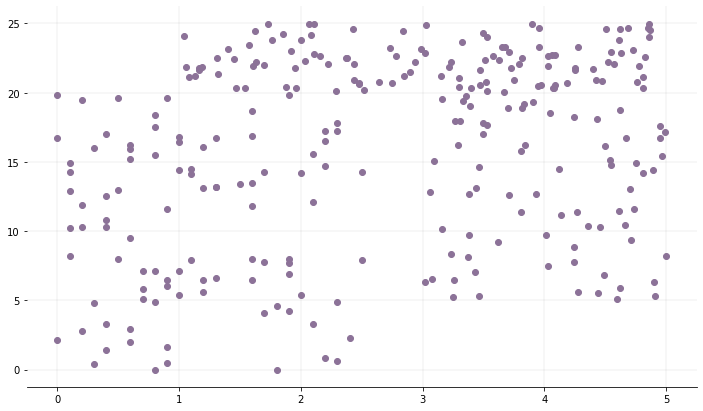

In [7]:
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing top, left and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()


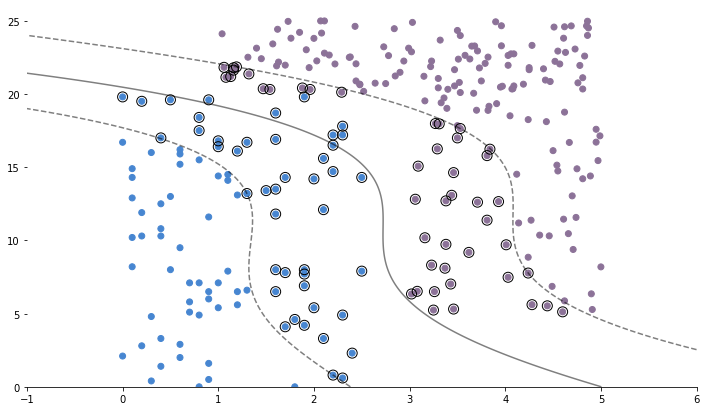

In [31]:
# applying SVM method for classification

from sklearn import svm
#model = svm.SVC(kernel='poly', degree=2) # for polynomial
#model = svm.SVC(kernel='linear') # for linear 
model = svm.SVC(kernel='rbf') #for Radial basis 
model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(12, 7))
# Removing top, left and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')

# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)

# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)

# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [32]:
# Model accuracy calculation
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
#sklearn.metrics.accuracy_score(y_test, predictions_poly)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print(f'Model Accuracy:{accuracy_poly}')

Model Accuracy:0.95


In [34]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions_poly)
print(matrix)
# plt.title('Confusion matrix for SVM')
#plt.show(matrix)
# plt.show()

[[ 5  1]
 [ 0 14]]


In [35]:
print(y_test)

[1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1]


In [37]:
print(predictions_poly)

[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1]
